# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Brandon Shellenberger
#### GitHub Link: https://github.com/Bshell13/shellenberger_module_07

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

#### Packages Installed

In [1]:
print('Possible Prereqs installed:')
!pip list

Possible Prereqs installed:
Package            Version


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



------------------ ------------
annotated-types    0.7.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               1.0.1
catalogue          2.0.10
certifi            2024.8.30
charset-normalizer 3.4.0
click              8.1.7
cloudpathlib       0.20.0
colorama           0.4.6
comm               0.2.2
confection         0.1.5
contourpy          1.3.1
cycler             0.12.1
cymem              2.0.10
debugpy            1.8.9
decorator          5.1.1
executing          2.1.0
fonttools          4.55.0
html5lib           1.1
idna               3.10
ipykernel          6.29.5
ipython            8.30.0
jedi               0.19.2
Jinja2             3.1.4
joblib             1.4.2
jupyter_client     8.6.3
jupyter_core       5.7.2
kiwisolver         1.4.7
langcodes          3.5.0
language_data      1.3.0
marisa-trie        1.2.1
markdown-it-py     3.0.0
MarkupSafe         3.0.2
matplotlib         3.9.2
matplotlib-inline  0.1.7
mdurl              0.1.2
murmurhash         1.0.11
nest-a

#### Question 1 - Extract HTML from website
Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [1]:
import requests
import pickle
response = requests.get('https://www.forbes.com/sites/prishe/2014/10/16/2014-al-champ-kansas-city-royals-their-economic-past-present-and-future/')

print(response.status_code)
print(response.headers['content-type'])

with open('shellenberger_module_07.pkl', 'wb') as file:
    pickle.dump(response.text, file)

200
text/html; charset=utf-8


#### Question 2 - Sentiment and Number of Sentences
Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [2]:
from bs4 import BeautifulSoup
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

def extract_text(file_name:str):
    '''
    Extracts text from an HTML file using BeautifulSoup
    The file needs to be stored in the same directory as this file
    '''
    with open(file_name, 'rb') as file:
        article_html = pickle.load(file)

    parser = 'html.parser'
    soup = BeautifulSoup(article_html, parser)
    article_element = soup.find('article')
    return article_element.get_text()

def extract_doc(article_text):
    '''
    This is used to fine the polarity score of text
    Download "en_core_web_sm" before working
    Type into terminal "py -m spacy download en_core_web_sm"
    '''
    nlp = spacy.load('en_core_web_sm')
    nlp.add_pipe('spacytextblob')
    return nlp(article_text)

def num_of_sentences(doc):
    '''
    Determines the nubmer of sentences in a text
    '''
    sentences = list(doc.sents)
    return len(sentences)    

file_name = 'shellenberger_module_07.pkl'
article_text = extract_text(file_name)
doc = extract_doc(article_text)
print(f'The polarity score of this article is {doc._.blob.polarity:.2f}.')
print(f'The number of sentences in this article is {num_of_sentences(doc)}.')


The polarity score of this article is 0.09.
The number of sentences in this article is 45.


#### Question 3 - Most Frequent Tokens
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [3]:
from collections import Counter

def most_frequent_tokens(doc):
    '''
    Counts the number of words and their variations and sets them into a list
    The returns the top 5 most used words in the text
    Stores values as such [(word_1, frequency), (word_2, frequency), ...]'''
    interesting_tokens = [token.text.lower() for token in doc if token.is_alpha and not(token.is_space or token.is_punct or token.is_stop)]
    return Counter(interesting_tokens).most_common(5)

most_common_tokens = most_frequent_tokens(doc)

print('Tope 5 Most Frequent Tokens:')
# Extracts individual elements into word and frequency
# and prints each word and frequency respectively.
for word, freq in most_common_tokens:
    print(f'The token {word} shows up {freq} times in the article.')

Tope 5 Most Frequent Tokens:
The token royals shows up 19 times in the article.
The token million shows up 14 times in the article.
The token team shows up 9 times in the article.
The token league shows up 9 times in the article.
The token teams shows up 9 times in the article.


#### Question 4 - Most Frequent Lemmas
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [4]:
def most_frequent_lemmas(doc):
    '''
    Counts the number of lemma words and their variations and sets them into a list
    The returns the top 5 most used words in the text
    Stores values as such [(word_1, frequency), (word_2, frequency), ...]'''
    interesting_tokens_lemma = [token.lemma_.lower() for token in doc if token.is_alpha and not(token.is_space or token.is_punct or token.is_stop)]
    return Counter(interesting_tokens_lemma).most_common(5)

most_common_lemmas = most_frequent_lemmas(doc)

print('Tope 5 Most Frequent Lemmas:')
# Extracts individual elements into word and frequency
# and prints each word and frequency respectively.
for word_lemma, freq_lemma in most_common_lemmas:
    print(f'The lemma token {word_lemma} shows up {freq_lemma} times in the article.')

Tope 5 Most Frequent Lemmas:
The lemma token team shows up 18 times in the article.
The lemma token royals shows up 18 times in the article.
The lemma token million shows up 14 times in the article.
The lemma token year shows up 9 times in the article.
The lemma token season shows up 9 times in the article.


#### Question 5 - Histogram of Common Tokens per Sentence
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Text(0, 0.5, 'Frequency')

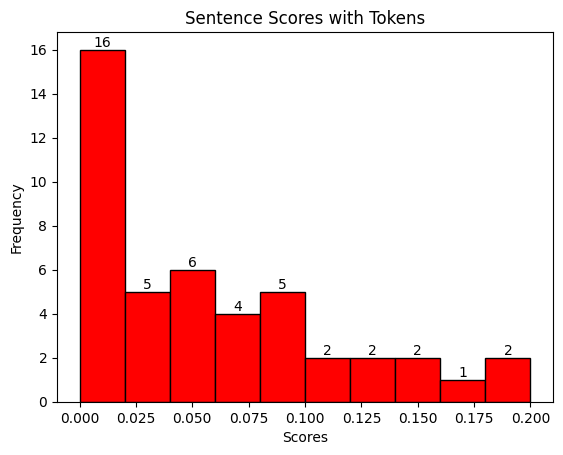

In [ ]:
import matplotlib.pyplot as plt

def token_count(sent):
    '''
    Counts the number of tokens in a sentence
    with no punctuation and no white space
    returns counts'''
    count = 0
    for token in sent:
        if not(token.is_punct or token.is_space):
            count+=1
    return count

def score_sentence_by_token(sent, word):
    '''
    Counts the nubmer of tokens compared to
    the most common words from Q3
    prints the ratio compared to total tokens'''
    count = 0
    for token in sent:
        if token.text.lower() in word:
            count+=1
    sent_length = token_count(sent)
    return count/sent_length

sentences = list(doc.sents) # seperates sentences into a list
most_common_word = [word for word, freq in most_common_tokens]
most_common_token_scores = [score_sentence_by_token(sent, most_common_word) for sent in sentences]

# Set up for number labels above each bar
values, bins, bars = plt.hist(most_common_token_scores, bins=10, color='Red', edgecolor='black')
plt.bar_label(bars, fontsize=10)
plt.title('Sentence Scores with Tokens')
plt.xlabel('Scores')
plt.ylabel('Frequency')

'''
The most common range of scores is 0 to 0.020. This means, on average, less than 2.00% of the
most common tokens are found in each sentence.
'''

#### Question 6 - Histogram of Lemmas per Sentence
Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Text(0, 0.5, 'Frequency')

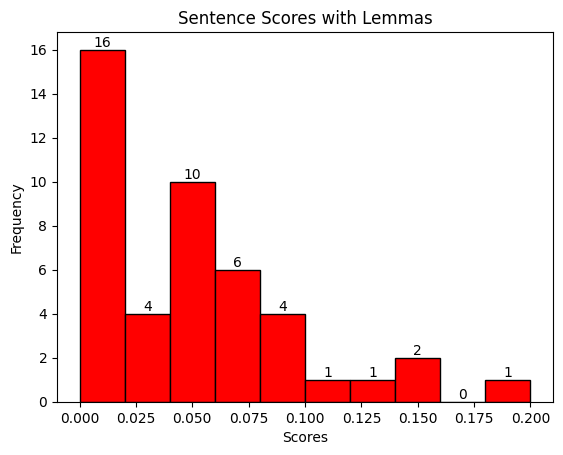

In [ ]:
def score_sentence_by_lemma(sent, word):
    '''
    Counts the nubmer of lemmas compared to
    the most common lemmas from Q4
    prints the ratio compared to total tokens'''
    count = 0
    for token in sent:
        if token.text.lower() in word:
            count+=1
    sent_length = token_count(sent)
    return count/sent_length

most_common_word_lemmas = [word_lemma for word_lemma, freq_lemma in most_common_lemmas]
most_common_lemma_scores = [score_sentence_by_lemma(sent, most_common_word_lemmas) for sent in sentences]

# Set up for number labels above each bar
values, bins, bars = plt.hist(most_common_lemma_scores, bins=10, color='Red', edgecolor='black')
plt.bar_label(bars, fontsize=10)
plt.title('Sentence Scores with Lemmas')
plt.xlabel('Scores')
plt.ylabel('Frequency')

'''
The most common range of scores is 0 to 0.020. This means, on average, less than 2.00% of the
most common lemmas are found in each sentence. Although, there is a spike between 0.04 and 0.06.
'''

#### Question 7 - Curoff Score
Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.10
* Cutoff Score (lemmas): 0.08

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?